<a href="https://colab.research.google.com/github/specM7/DSGP_Group_33_Brain_Tumor_Predictor/blob/NoTumor-%26-Chatbot-Ahshaan-2506751/MRI_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Dataset directory (MRI vs NonMRI)
dataset_dir = "/content/drive/MyDrive/Validate_MRI_Image/Dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# Numerical operations
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow / Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report


In [19]:
# Image size and batch size
img_size = 150
batch_size = 16

# Normalize images and split dataset into training and validation
datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2
)

# Training data loader (80%)
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

# Validation data loader (20%)
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)


Found 6898 images belonging to 2 classes.
Found 1724 images belonging to 2 classes.


In [20]:
# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,308,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,327,937 (20.32 MB)

 Trainable params: 5,327,937 (20.32 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Number of training epochs
epochs = 15

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
287/432 ━━━━━━━━━━━━━━━━━━━━ 4:02 2s/step - accuracy: 0.9514 - loss: 0.1666

/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


432/432 ━━━━━━━━━━━━━━━━━━━━ 793s 2s/step - accuracy: 0.9625 - loss: 0.1291 - val_accuracy: 0.9971 - val_loss: 0.0152
Epoch 2/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 298s 690ms/step - accuracy: 0.9977 - loss: 0.0092 - val_accuracy: 0.9954 - val_loss: 0.0301
Epoch 3/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 291s 673ms/step - accuracy: 0.9989 - loss: 0.0019 - val_accuracy: 0.9965 - val_loss: 0.0422
Epoch 4/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 292s 675ms/step - accuracy: 0.9995 - loss: 7.2595e-04 - val_accuracy: 0.9983 - val_loss: 0.0231
Epoch 5/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 291s 675ms/step - accuracy: 1.0000 - loss: 8.7154e-05 - val_accuracy: 0.9983 - val_loss: 0.0187
Epoch 6/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 291s 674ms/step - accuracy: 1.0000 - loss: 7.7274e-06 - val_accuracy: 0.9983 - val_loss: 0.0200
Epoch 7/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 292s 676ms/step - accuracy: 1.0000 - loss: 5.3835e-06 - val_accuracy: 0.9983 - val_loss: 0.0203
Epoch 8/15
432/432 ━━━━━━━━━━━━━━━━━━━━ 292s 675ms/step - accuracy: 1.0000

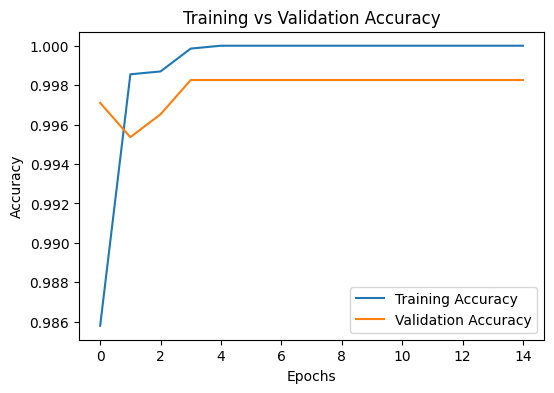

In [22]:
# Plot accuracy graph
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


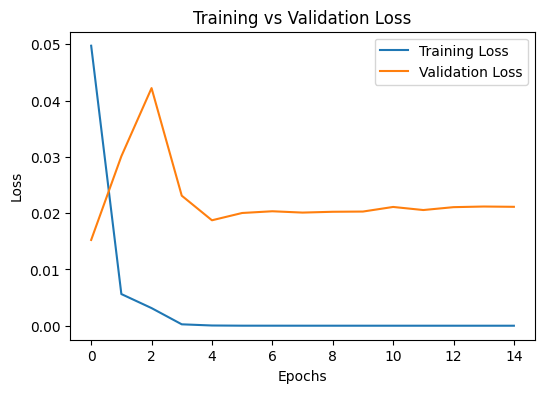

In [23]:
# Plot loss graph
plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


In [24]:
# Evaluate model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print("Validation Accuracy:", val_accuracy)


108/108 ━━━━━━━━━━━━━━━━━━━━ 25s 225ms/step - accuracy: 0.9996 - loss: 0.0044
Validation Accuracy: 0.9982598423957825


108/108 ━━━━━━━━━━━━━━━━━━━━ 32s 287ms/step


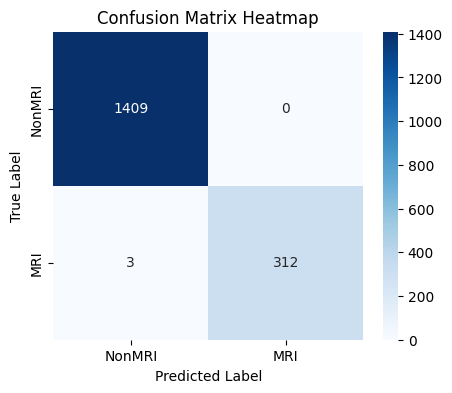

In [25]:
# Generate predictions
pred_probs = model.predict(val_generator)
pred_labels = (pred_probs > 0.5).astype(int).ravel()

# True labels
true_labels = val_generator.classes

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['NonMRI', 'MRI'],
    yticklabels=['NonMRI', 'MRI']
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
